In [1]:
from src.model_tester import *
from src.produce_datasets import *
import matplotlib.ticker as mtick
sns.set_style('darkgrid')
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_json('data/training_dataset.json')

In [3]:
df = df.dropna()

In [4]:
X = df.loc[:,features].values


In [5]:
y_target = df.loc[:,['recovery']].values * 1

In [6]:
y_target = y_target.reshape(len(y_target),)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=.2, stratify = y_target)

In [8]:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

models =  instan_dumb_classifiers()

fit_models(models, 'recovery', X_train, X_test, y_train, y_test)

models

df_dumb = pd.DataFrame(columns = ['Name', 'AUC', 'Accuracy', 'Precision', 'Recall', 'f1'])
model_names = ['Logistic Regression', 'Decision Tree', 'kNN', 'Random Forest', 'Gradient Boost', 'SVC', 'XG Boost']
counter = 0
for model in models:
        row = []
        y_predict = model.predict(X_test)
        row.append(model_names[counter])
        row.append(roc_auc_score(y_test, y_predict))
        row.append(accuracy_score(y_test, y_predict))
        row.append(precision_score(y_test, y_predict))
        row.append(recall_score(y_test, y_predict))
        row.append(f1_score(y_test, y_predict))
# cf_matrix = confusion_matrix(y_test, y_predict )
#         row.append(cf_matrix)
        df_dumb.loc[len(df_dumb)] = row
        counter += 1
counter = 0

df_melted = pd.melt(df_dumb, id_vars="Name", var_name="Model", value_name="Score")
fig, ax = plt.subplots(figsize = (8, 4))
ax = sns.barplot(data = df_melted, x = 'Name', y = 'Score', hue = 'Model')
ax.set_title('Models(dumb)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

/home/cj/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/cj/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


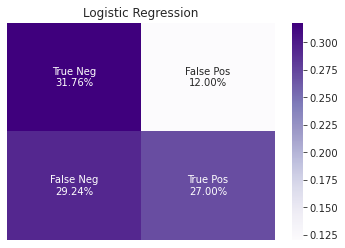

/home/cj/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


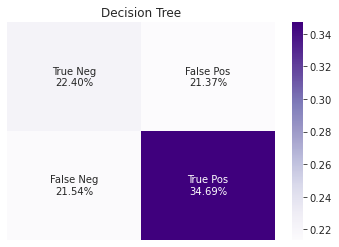

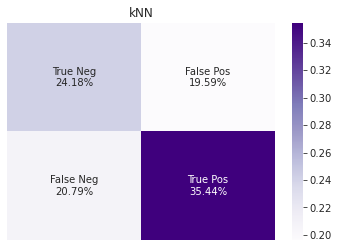

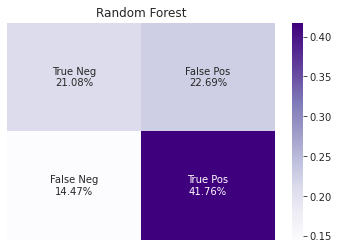

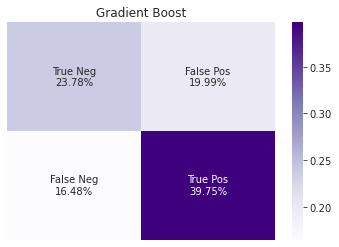

/home/cj/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


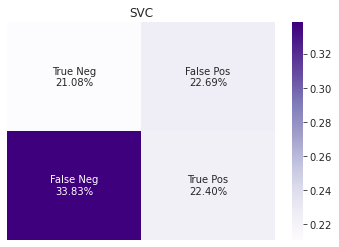

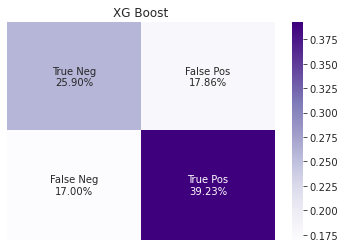

,Name,AUC,Accuracy,Precision,Recall,f1
0,Logistic Regression,0.602902,0.587593,0.692194,0.480082,0.566948
1,Decision Tree,0.564384,0.570936,0.618852,0.616956,0.617903
2,kNN,0.591364,0.596209,0.644050,0.630235,0.637068
3,Random Forest,0.612111,0.628374,0.647950,0.742594,0.692051
4,Gradient Boost,0.625075,0.635267,0.665385,0.706844,0.685488
5,SVC,0.439996,0.434808,0.496815,0.398366,0.442177
6,XG Boost,0.644757,0.651350,0.687123,0.697651,0.692347


In [9]:
models =  instan_tuned_classifiers()
# fit_models(models, 'recovery', X_train, X_test, y_train, y_test)
df_tuned = pd.DataFrame(columns = ['Name', 'AUC', 'Accuracy', 'Precision', 'Recall', 'f1'])
model_names = ['Logistic Regression', 'Decision Tree', 'kNN', 'Random Forest', 'Gradient Boost', 'SVC', 'XG Boost']
counter = 0
for model in models:
        row = []
        model.fit(X_train,y_train)
        y_predict = model.predict(X_test)
        row.append(model_names[counter])
        row.append(roc_auc_score(y_test, y_predict))
        row.append(accuracy_score(y_test, y_predict))
        row.append(precision_score(y_test, y_predict))
        row.append(recall_score(y_test, y_predict))
        row.append(f1_score(y_test, y_predict))
        cf_matrix = confusion_matrix(y_test, y_predict )
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)

        fig, ax = plt.subplots()
        ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, 
              fmt='', cmap='Purples');
        ax.set_title(row[0])
        ax.set_yticks([])
        ax.set_xticks([])
        plt.show()
#         row.append(cf_matrix)
        df_tuned.loc[len(df_tuned)] = row
        counter += 1
counter = 0
df_tuned

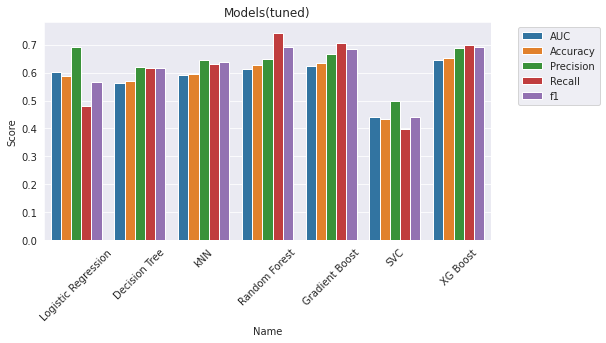

In [10]:
df_melted = pd.melt(df_tuned, id_vars="Name", var_name="Model", value_name="Score")
fig, ax = plt.subplots(figsize = (8, 4))
ax = sns.barplot(data = df_melted, x = 'Name', y = 'Score', hue = 'Model', )
ax.axhline(y = df_dumb.loc[,
#                     color = 'purple', linewidth = .5, alpha = .5, label = 'Dumb RFR f1')
ax.set_title('Models(tuned)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [11]:
df_2020 = feature_space('2020')
df_2020.head(30)

/home/cj/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


industry_code,10,101,1011,1012,1013,102,1021,1022,1023,1024,...,51811,518111,518112,52593,525930,541710,561310,517210,541711,541712
area_fips,,,,,,,,,,,,,,,,,,,,,
1000,1983835.0,0.193093,0.009052,0.047551,0.136490,0.619646,0.189821,0.010413,0.047987,0.126556,...,0,0,0,0,0,0,0,0,0,0
1001,11070.0,0.200903,0.016260,0.043812,0.140831,0.564408,0.191509,0.002349,0.038753,0.056188,...,0,0,0,0,0,0,0,0,0,0
1003,76061.0,0.121771,0.009808,0.057191,0.054772,0.743272,0.232195,0.005864,0.053352,0.082789,...,0,0,0,0,0,0,0,0,0,0
1005,8410.0,0.350654,0.034245,0.017717,0.298692,0.451605,0.161237,0.001784,0.027586,0.058264,...,0,0,0,0,0,0,0,0,0,0
1007,4868.0,0.319022,0.014585,0.183648,0.120789,0.411873,0.198233,0.000000,0.020542,0.025267,...,0,0,0,0,0,0,0,0,0,0
1009,8560.0,0.226051,0.008411,0.064720,0.152921,0.524533,0.187500,0.006075,0.030491,0.057009,...,0,0,0,0,0,0,0,0,0,0
1011,2932.0,0.361528,0.098909,0.000000,0.000000,0.433151,0.107776,0.000000,0.018759,0.083220,...,0,0,0,0,0,0,0,0,0,0
1013,6768.0,0.260934,0.028664,0.029994,0.202275,0.605201,0.214539,0.008274,0.026300,0.095597,...,0,0,0,0,0,0,0,0,0,0
1015,44530.0,0.178419,0.005143,0.022300,0.150977,0.547451,0.194768,0.009028,0.028700,0.088053,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_2020 = feature_space('2020')
df_2020 = df_2020[df_2020['10'] != 0]
for column in features:
        if column not in df_2020.columns:
            df_2020[column] = 0

X_prime = df_2020.loc[:,features].values
scaler.fit(X_prime)
X_prime = scaler.transform(X_prime)

/home/cj/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [13]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4429 entries, 1000 to USNMS
Columns: 2500 entries, 10 to 722213
dtypes: float64(2231), int64(269)
memory usage: 84.5+ MB


In [14]:
    recovery_model = RFC(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=15, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=10, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, verbose=0,
                        warm_start=False)

In [15]:
recovery_model.fit(X_train, y_train)
recov_predict =  recovery_model.predict(X_prime)
recov_predict
recov_likelihood = recovery_model.predict_proba(X_prime)
# df_2020['recov_predict'] = recov_predict
# df_2020['recov_likelihood'] = recov_likelihood
# df_2020.to_json('data/prediction_2020.json')


In [16]:
len(recov_predict)

4429

In [17]:
recov_predict.sum()

2852

In [18]:
df_2020.shape

(4429, 2500)

In [19]:
recov_likelihood = recovery_model.predict_proba(X_prime)

In [20]:
df_2020

industry_code,10,101,1011,1012,1013,102,1021,1022,1023,1024,...,532292,532299,7221,72211,722110,7222,72221,722211,722212,722213
area_fips,,,,,,,,,,,,,,,,,,,,,
1000,1983835.0,0.193093,0.009052,0.047551,0.136490,0.619646,0.189821,0.010413,0.047987,0.126556,...,0,0,0,0,0,0,0,0,0,0
1001,11070.0,0.200903,0.016260,0.043812,0.140831,0.564408,0.191509,0.002349,0.038753,0.056188,...,0,0,0,0,0,0,0,0,0,0
1003,76061.0,0.121771,0.009808,0.057191,0.054772,0.743272,0.232195,0.005864,0.053352,0.082789,...,0,0,0,0,0,0,0,0,0,0
1005,8410.0,0.350654,0.034245,0.017717,0.298692,0.451605,0.161237,0.001784,0.027586,0.058264,...,0,0,0,0,0,0,0,0,0,0
1007,4868.0,0.319022,0.014585,0.183648,0.120789,0.411873,0.198233,0.000000,0.020542,0.025267,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS566,230509.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
US000,147088945.0,0.147475,0.012011,0.049439,0.086025,0.701259,0.184874,0.019602,0.056622,0.142778,...,0,0,0,0,0,0,0,0,0,0
USCMS,112858175.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
